In [54]:
import numpy as np
import pandas as pd 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [37]:
#Step -1 Generate Data

X,y = make_regression(n_samples = 500, n_features=10, n_informative=5, noise=25.8, random_state=0)
print(X.shape, y.shape)
n_features = X.shape[1]

(500, 10) (500,)


In [14]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.706468,1.511639,-0.000417,0.374155,0.073285,0.701783,0.409552,-0.461894,-0.626490,-0.799593
1,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
2,0.093953,-0.130107,0.929505,0.582225,-2.739677,0.943046,-2.094603,-0.569312,0.269904,0.123722
3,-1.542758,-0.789954,0.537035,-0.286835,-2.369623,-0.767332,1.634406,-0.260560,0.128957,0.571227
4,-0.101003,-2.231538,0.436187,1.571463,1.324868,-0.587375,1.077315,0.840648,0.261106,0.811090


In [16]:
# Step 2 Normalise
def normalise(X):
    u = X.mean(axis=0)
    std = X.std(axis=0)
    return (X-u)/std

In [17]:
X = normalise(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


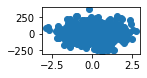

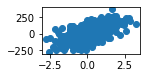

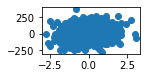

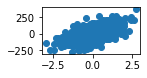

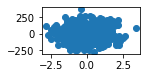

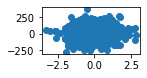

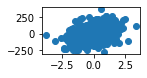

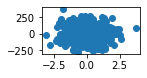

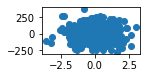

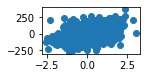

In [25]:
# Visualise y as a function of each feature

for f in range(0,10):
    plt.subplot(4,3,f+1)
    plt.scatter(X[:,f],y)
    plt.show()

In [28]:
# Step 4 Train test split

XT, Xt, yT, yt = train_test_split(X,y, test_size =0.3, shuffle=False, random_state=0)

In [32]:
print(XT.shape, yT.shape)
print(Xt.shape, yt.shape)

(350, 10) (350,)
(150, 10) (150,)


In [39]:
#Modelling/ Linear regression with multiple features

def preprocess(X):
    #add a column of 1s in X as 0th column
    if X.shape[1] == n_features:
        m = X.shape[0]
        ones = np.ones((m,1))
        X = np.hstack((ones,X))
    return X

In [70]:
def hypothesis(X, theta):
    return np.dot(X,theta)

def loss(X,y,theta):
    yp = hypothesis(X, theta)
    error = np.mean((y-yp)**2)
    return error

def gradient(X,y,theta):
    yp = hypothesis(X,theta)
    grad = np.dot(X.T, (yp-y))
    m = X.shape[0]
    return grad/m

def train(X, y,learning_rate = 0.1, max_iters=100):
    n = X.shape[1]
    theta = np.random.randn(n)
    error_list = []
    
    for i in range(max_iters):
        e = loss(X,y,theta)
        error_list.append(e)
        grad = gradient(X,y,theta)
        theta = theta -learning_rate * grad
        
    plt.plot(error_list)
    return theta
        

[-5.15783297 -0.2665698  61.81946685 11.37823934 65.52668513 -0.48101462
  0.93745215 41.1753347   0.54485545  0.75642332 22.42699587]


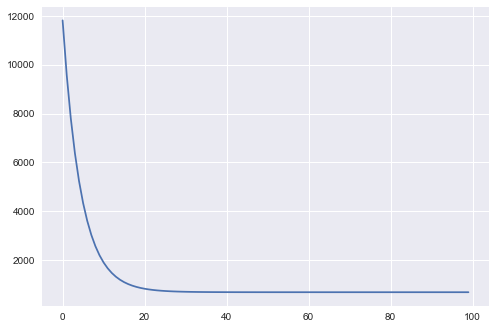

In [55]:
theta = train(XT,yT)
print(theta)

In [41]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.706468,1.511639,-0.000417,0.374155,0.073285,0.701783,0.409552,-0.461894,-0.626490,-0.799593
1,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
2,0.093953,-0.130107,0.929505,0.582225,-2.739677,0.943046,-2.094603,-0.569312,0.269904,0.123722
3,-1.542758,-0.789954,0.537035,-0.286835,-2.369623,-0.767332,1.634406,-0.260560,0.128957,0.571227
4,-0.101003,-2.231538,0.436187,1.571463,1.324868,-0.587375,1.077315,0.840648,0.261106,0.811090


In [43]:
XT = preprocess(XT)
Xt = preprocess(Xt)
pd.DataFrame(XT).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,1.0,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,1.0,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,1.0,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,1.0,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


In [44]:
print(XT.shape, Xt.shape)

(350, 11) (150, 11)


In [56]:
def r2Score(y, yp):
    ymean = y.mean()
    num = np.sum((y-yp)**2)
    denom = np.sum((y-ymean)**2)
    return 1 - num/denom

In [59]:
yp = hypothesis(Xt, theta)

In [61]:
r2Score(yt,yp)

0.9321414037681874

In [63]:
from sklearn.linear_model import LinearRegression       

In [64]:
model = LinearRegression()

In [65]:
model.fit(XT,yT)

LinearRegression()

In [66]:
yp = model.predict(Xt)

In [68]:
yp.shape

(150,)

In [69]:
model.score(Xt,yt)

0.9321372696807685